<a href="https://colab.research.google.com/github/YasinnSoylu/Bank-customer-churn-ANN-and-auto-ml/blob/main/Bank_customer_churn_pred_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [98]:
df = pd.read_csv("Churn_Modelling.csv")

In [99]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [101]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [102]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#Data Analysis

In [103]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

## We will plot a Pie Chart 

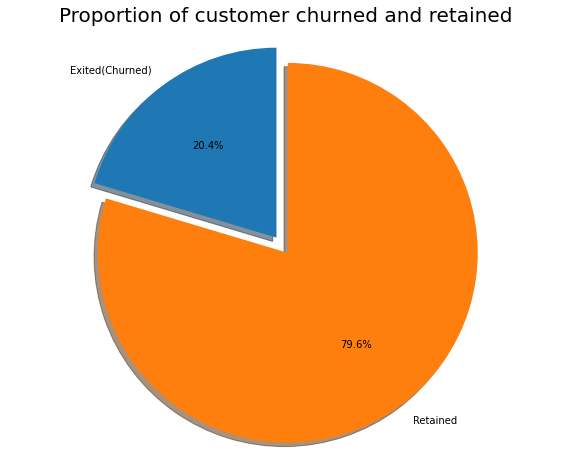

In [105]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [106]:
import seaborn as sns

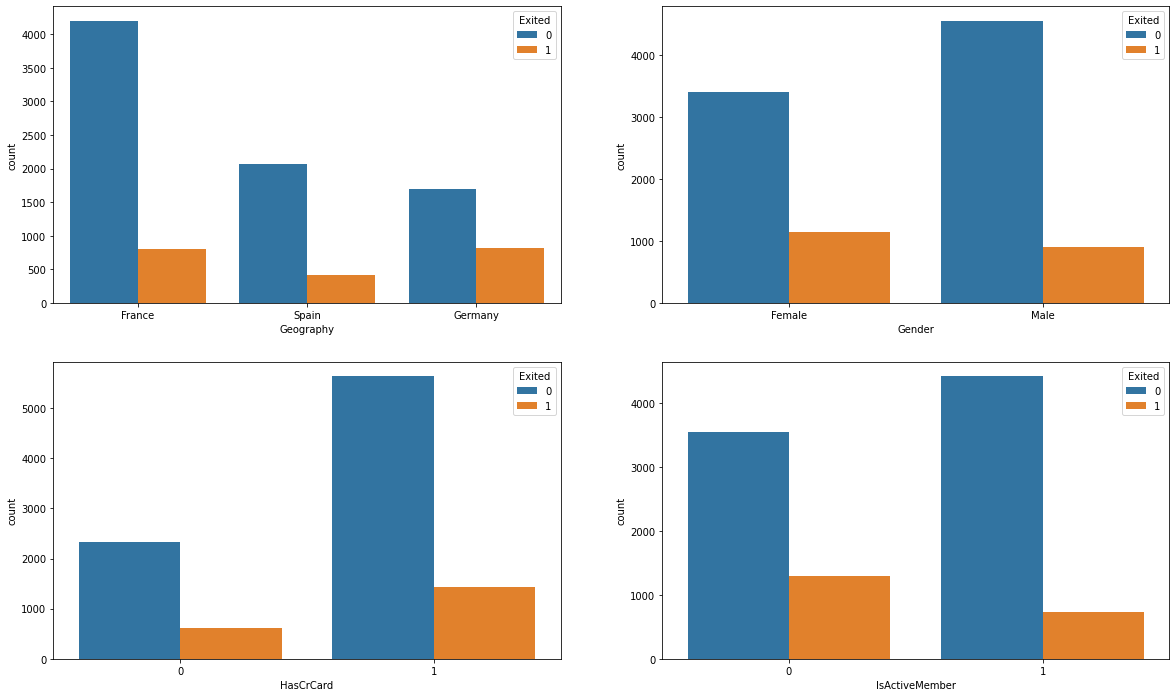

In [107]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

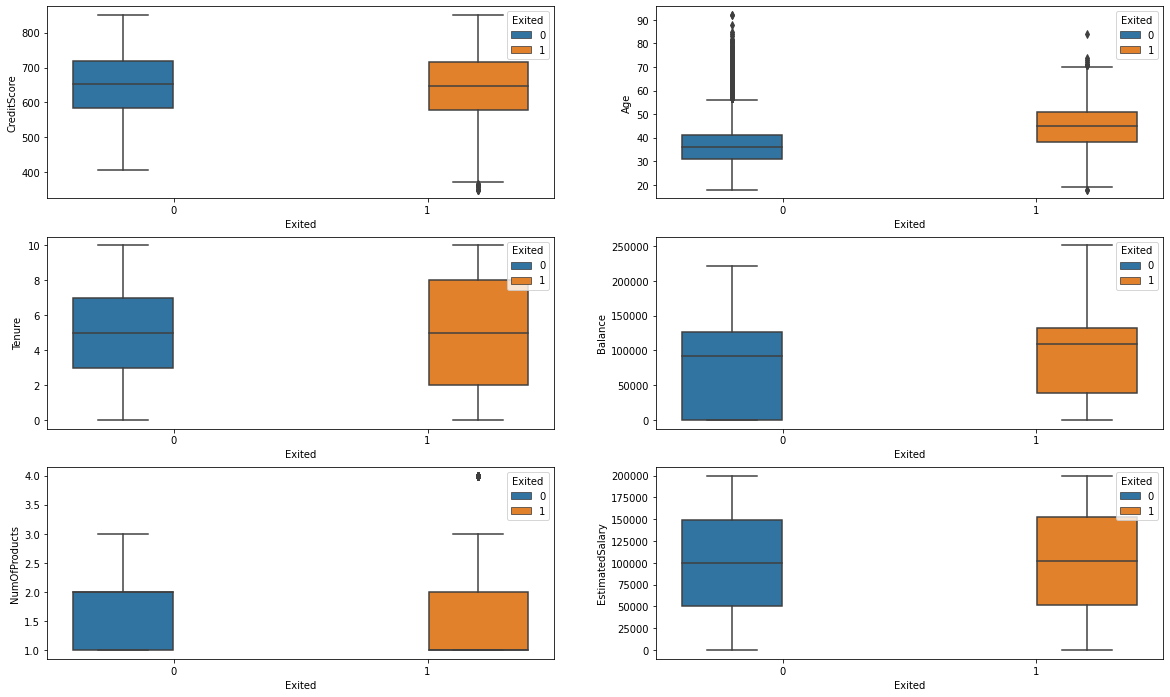

In [108]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

### Making a new column BalanceSalaryRatio

(-1.0, 5.0)

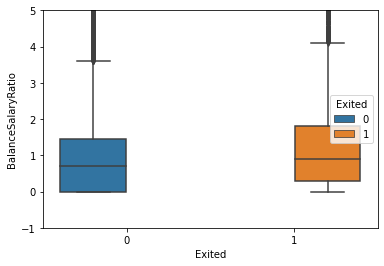

In [109]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

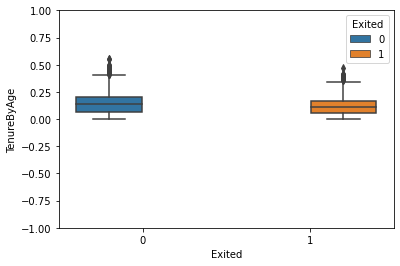

In [110]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

#### Printing the categorical variables

In [111]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [112]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### Label Encoding

In [113]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

### One Hot Encoding 

In [114]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [115]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [116]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [117]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [118]:
len(X_train.columns)

14

In [119]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6729 - accuracy: 0.6865
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7959
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7944
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7922
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7940
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7979
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8061
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8112
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4285 - accura

In [120]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8530


[0.35466140508651733, 0.8529999852180481]

In [121]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 1ms/step


array([[0.02884333],
       [0.09394766],
       [0.06890336],
       ...,
       [0.02251769],
       [0.02034748],
       [0.08441016]], dtype=float32)

### Converting our predictions to 0,1 to check accuracy

In [122]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

### Checking the accuracy 

In [123]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.47      0.56       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

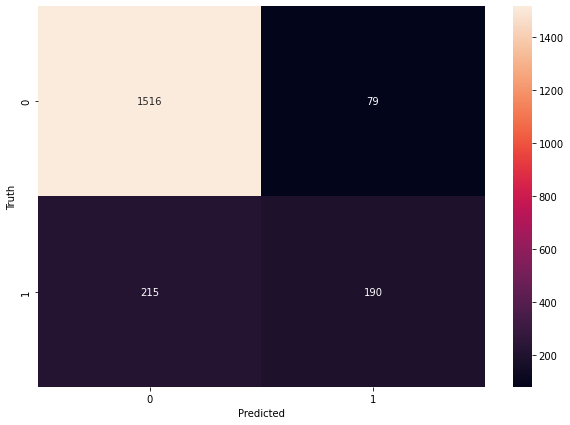

In [124]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Auto ML

#**H2O Auto ML**

In [125]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,8 mins 01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,"14 days, 19 hours and 42 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_xoeypz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.98 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Loading the data

In [126]:
df = h2o.import_file("/content/Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [127]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


## H2O auto ml can do all the data preprocessing techniques

In [128]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [129]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0
11,1.57678e+07,Bearce,528,France,Male,31,6,102017,2,0,0,80181.1,0


In [130]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

### Defining the model

In [131]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

### Fitting the model

In [132]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
13:09:11.659: Project: AutoML_3_20230120_130911
13:09:11.660: Setting stopping tolerance adaptively based on the training frame: 0.011186634139959345
13:09:11.660: Build control seed: 10
13:09:11.661: training frame: Frame key: AutoML_3_20230120_130911_training_py_15_sid_810e    cols: 14    rows: 7991  chunks: 8    size: 425580  checksum: 2479989488683105434
13:09:11.661: validation frame: NULL
13:09:11.661: leaderboard frame: NULL
13:09:11.661: blending frame: NULL
13:09:11.661: response column: Exited
13:09:11.661: fold column: null
13:09:11.661: weights column: null
13:09:11.664: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), gri

,mean,sd,cv_1_valid,cv_2_valid
mae,0.2091462,0.0008100,0.2097189,0.2085734
mean_residual_deviance,0.1022025,0.0003398,0.1024427,0.1019622
mse,0.1022025,0.0003398,0.1024427,0.1019622
null_deviance,641.37067,4.0947666,638.4752,644.26605
r2,0.3632804,0.0049752,0.3667984,0.3597623
residual_deviance,408.338,5.7970443,404.2389,412.43713
rmse,0.3196910,0.0005314,0.3200667,0.3193152
rmsle,0.2246904,0.0008471,0.2240913,0.2252894


### Seeing the Leaderboard

In [133]:
lb = aml.leaderboard

In [134]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20230120_130911,0.319688,0.102201,0.208944,0.224728,0.102201
StackedEnsemble_BestOfFamily_1_AutoML_3_20230120_130911,0.320398,0.102655,0.209545,0.225275,0.102655
GBM_2_AutoML_3_20230120_130911,0.32112,0.103118,0.210591,0.225816,0.103118
GBM_3_AutoML_3_20230120_130911,0.322246,0.103842,0.209844,0.226601,0.103842
GBM_1_AutoML_3_20230120_130911,0.322841,0.104227,0.217056,0.22706,0.104227
GBM_4_AutoML_3_20230120_130911,0.324296,0.105168,0.213401,0.228699,0.105168
DRF_1_AutoML_3_20230120_130911,0.327494,0.107252,0.215339,0.232024,0.107252
XGBoost_3_AutoML_3_20230120_130911,0.328605,0.107981,0.219446,0.232725,0.107981
XRT_1_AutoML_3_20230120_130911,0.341808,0.116833,0.253841,0.244894,0.116833
XGBoost_2_AutoML_3_20230120_130911,0.35422,0.125472,0.240191,0.25585,0.125472


## Getting all the model ids

In [135]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [136]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_3_20230120_130911',
 'StackedEnsemble_BestOfFamily_1_AutoML_3_20230120_130911',
 'GBM_2_AutoML_3_20230120_130911',
 'GBM_3_AutoML_3_20230120_130911',
 'GBM_1_AutoML_3_20230120_130911',
 'GBM_4_AutoML_3_20230120_130911',
 'DRF_1_AutoML_3_20230120_130911',
 'XGBoost_3_AutoML_3_20230120_130911',
 'XRT_1_AutoML_3_20230120_130911',
 'XGBoost_2_AutoML_3_20230120_130911',
 'XGBoost_1_AutoML_3_20230120_130911',
 'GLM_1_AutoML_3_20230120_130911']

In [137]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.10152818960748888
RMSE: 0.3186348844798524
MAE: 0.2040268493171124
RMSLE: 0.22304836073133524
Mean Residual Deviance: 0.10152818960748888
R^2: 0.3985063102715197
Null degrees of freedom: 2008
Residual degrees of freedom: 2002
Null deviance: 339.5100569513506
Residual deviance: 203.97013292144516
AIC: 1121.8706794416946

### Getting the model details for best performing model

In [138]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

,mean,sd,cv_1_valid,cv_2_valid
mae,0.2091462,0.0008100,0.2097189,0.2085734
mean_residual_deviance,0.1022025,0.0003398,0.1024427,0.1019622
mse,0.1022025,0.0003398,0.1024427,0.1019622
null_deviance,641.37067,4.0947666,638.4752,644.26605
r2,0.3632804,0.0049752,0.3667984,0.3597623
residual_deviance,408.338,5.7970443,404.2389,412.43713
rmse,0.3196910,0.0005314,0.3200667,0.3193152
rmsle,0.2246904,0.0008471,0.2240913,0.2252894


In [139]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_3_20230120_130911',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_3_20230120_130911'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20230120_130911_training_py_15_sid_810e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20230120_130911_training_py_15_sid_810e'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20230120_130911_training_py_15_sid_810e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20230120_130911_training_py_15_sid_810e'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    

In [140]:
#output.varimp_plot()

In [141]:
aml.leader

,mean,sd,cv_1_valid,cv_2_valid
mae,0.2091462,0.0008100,0.2097189,0.2085734
mean_residual_deviance,0.1022025,0.0003398,0.1024427,0.1019622
mse,0.1022025,0.0003398,0.1024427,0.1019622
null_deviance,641.37067,4.0947666,638.4752,644.26605
r2,0.3632804,0.0049752,0.3667984,0.3597623
residual_deviance,408.338,5.7970443,404.2389,412.43713
rmse,0.3196910,0.0005314,0.3200667,0.3193152
rmsle,0.2246904,0.0008471,0.2240913,0.2252894


In [142]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [143]:
y_pred

predict
0.139626
0.0296613
0.401456
0.300331
-0.00777054
0.185182
0.0675511
1.08343
0.182652
0.0226222
